## Upload Libiraries :

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib
import matplotlib.cm as cm
from PIL import Image
from scipy import signal


### Data Preprocessing:

In [2]:
path = 'D:/Master2/ML2/TP/iitdelhi' #local path of iitdelhi dataset
imagePaths = [os.path.join(path, f) for f in os.listdir(path)]

data = []
for imagePath in imagePaths: 
    pilImage = cv2.imread(imagePath)
    data.append(pilImage)

data = np.array(data)

In [3]:
data.shape

(493, 180, 50, 3)

In [4]:
#Convert images into grayscale
Data_gray = []
for i in data:
    Data_gray.append(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY))


In [5]:
#Reshape images
data2=[]
for i in Data_gray:
    data2.append(i.reshape(-1))
    
pixels = np.array(data2)
pixels.shape

(493, 9000)

In [6]:
labels = []
for i in imagePaths:
    labels.append((i)[27:30])

### Split Data

In [7]:
#Spliting Data
x_train, x_test, y_train, y_test = train_test_split( pixels, labels, test_size = 0.3, stratify = labels)

### Normalization:

In [8]:
#Normalization
x_train = x_train/ 255
x_test = x_test/255

### Classification using KNN Classsifier:

In [9]:
modelknn = KNeighborsClassifier(n_neighbors = 3)

# Training the classifier
modelknn.fit(x_train, y_train)

#Predict Output for the test
y_pred1 = modelknn.predict(x_test)

In [10]:
#The model evaluation
print("\n Classification report of the model: \n",classification_report(y_test, y_pred1))


 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.67      1.00      0.80         2
         002       1.00      1.00      1.00         1
         003       0.67      1.00      0.80         2
         004       0.50      1.00      0.67         2
         005       1.00      1.00      1.00         1
         006       1.00      1.00      1.00         1
         007       0.50      1.00      0.67         1
         008       1.00      1.00      1.00         1
         009       0.33      1.00      0.50         1
         010       1.00      1.00      1.00         1
         011       1.00      1.00      1.00         1
         012       0.33      1.00      0.50         1
         013       1.00      1.00      1.00         1
         014       1.00      1.00      1.00         1
         015       0.50      1.00      0.67         1
         016       1.00      1.00      1.00         1
         017       0.00      0.00      0.

C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Implement PCA:

In [11]:
pca = PCA(n_components = 125).fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Fit the model
modelknn.fit(x_train_pca, y_train)

# Testing the classifier
y_pred2 = modelknn.predict(x_test_pca)

In [12]:
#The model evaluation
print("\n Classification report of the model: \n",classification_report(y_test, y_pred2))


 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.67      1.00      0.80         2
         002       1.00      1.00      1.00         1
         003       0.67      1.00      0.80         2
         004       0.50      1.00      0.67         2
         005       1.00      1.00      1.00         1
         006       1.00      1.00      1.00         1
         007       0.50      1.00      0.67         1
         008       1.00      1.00      1.00         1
         009       0.33      1.00      0.50         1
         010       1.00      1.00      1.00         1
         011       1.00      1.00      1.00         1
         012       0.33      1.00      0.50         1
         013       1.00      1.00      1.00         1
         014       1.00      1.00      1.00         1
         015       0.50      1.00      0.67         1
         016       1.00      1.00      1.00         1
         017       0.00      0.00      0.

C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Implement ANN

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [14]:
x_train.shape, y_train.shape

((345, 9000), (345, 126))

In [15]:
#for original data
model = Sequential()
model.add(Dense(345, input_dim = 9000, activation = "relu"))
model.add(Dense(200, activation = "relu"))
model.add(Dense(126, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = np.array(y_train)
history = model.fit( x_train, y_train, epochs = 250, verbose=1)

Epoch 1/250
11/11 [==============================] - 0s 23ms/step - loss: 5.5647 - accuracy: 0.0029
Epoch 2/250
11/11 [==============================] - 0s 21ms/step - loss: 4.9393 - accuracy: 0.0116
Epoch 3/250
11/11 [==============================] - 0s 19ms/step - loss: 4.8254 - accuracy: 0.0116
Epoch 4/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8081 - accuracy: 0.0174
Epoch 5/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8063 - accuracy: 0.0116
Epoch 6/250
11/11 [==============================] - 0s 19ms/step - loss: 4.7564 - accuracy: 0.0145
Epoch 7/250
11/11 [==============================] - 0s 20ms/step - loss: 4.7235 - accuracy: 0.0261
Epoch 8/250
11/11 [==============================] - 0s 20ms/step - loss: 4.6546 - accuracy: 0.0261
Epoch 9/250
11/11 [==============================] - 0s 21ms/step - loss: 4.5814 - accuracy: 0.0232
Epoch 10/250
11/11 [==============================] - 0s 19ms/step - loss: 4.5127 - accuracy: 0.0348

In [16]:
model.predict(x_test)

array([[5.61846774e-33, 3.88243220e-38, 9.83108890e-32, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.33090585e-14, 9.51125461e-04, 7.14618489e-15, ...,
        1.44944112e-09, 1.04874577e-23, 4.46050752e-09],
       [8.57921423e-17, 2.95702929e-14, 1.79768404e-13, ...,
        2.65667564e-15, 2.42305606e-32, 3.52955133e-31],
       ...,
       [3.11824927e-22, 1.71811346e-19, 1.62677010e-19, ...,
        5.02679894e-31, 0.00000000e+00, 0.00000000e+00],
       [1.70506477e-37, 0.00000000e+00, 0.00000000e+00, ...,
        1.13195451e-31, 3.49434734e-24, 9.99957204e-01],
       [9.83823547e-20, 1.04667116e-07, 1.34169979e-33, ...,
        2.68364747e-10, 0.00000000e+00, 2.03379733e-23]], dtype=float32)

In [17]:
y_test = np.array(y_test)
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 4.5330 - accuracy: 0.5405


[4.533006191253662, 0.5405405163764954]

In [18]:
#for compressed data

#Normalization
x_train_pca = x_train_pca/ 255
x_test_pca = x_test_pca/255

model_pca = Sequential()
model_pca.add(Dense(345, input_dim = 125, activation = "relu"))
model_pca.add(Dense(200, activation = "relu"))
model_pca.add(Dense(126, activation = "softmax"))

model_pca.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_pca.fit( x_train_pca, y_train, epochs = 250, verbose=1)

Epoch 1/250
11/11 [==============================] - 0s 3ms/step - loss: 4.8368 - accuracy: 0.0203
Epoch 2/250
11/11 [==============================] - 0s 3ms/step - loss: 4.8319 - accuracy: 0.0493
Epoch 3/250
11/11 [==============================] - 0s 2ms/step - loss: 4.8259 - accuracy: 0.0551
Epoch 4/250
11/11 [==============================] - 0s 2ms/step - loss: 4.8176 - accuracy: 0.0522
Epoch 5/250
11/11 [==============================] - 0s 3ms/step - loss: 4.8040 - accuracy: 0.0580
Epoch 6/250
11/11 [==============================] - 0s 2ms/step - loss: 4.7862 - accuracy: 0.0406
Epoch 7/250
11/11 [==============================] - 0s 2ms/step - loss: 4.7568 - accuracy: 0.0464
Epoch 8/250
11/11 [==============================] - 0s 2ms/step - loss: 4.7228 - accuracy: 0.0464
Epoch 9/250
11/11 [==============================] - 0s 2ms/step - loss: 4.6751 - accuracy: 0.0667
Epoch 10/250
11/11 [==============================] - 0s 2ms/step - loss: 4.6228 - accuracy: 0.0522
Epoch 11/

In [19]:
model_pca.predict(x_test_pca)

array([[1.08653324e-28, 1.08421296e-16, 1.63054867e-08, ...,
        4.74111364e-13, 2.90690493e-20, 3.56171449e-06],
       [2.41325942e-24, 1.83842820e-03, 1.99163722e-07, ...,
        3.24049688e-05, 2.13439767e-14, 1.54031079e-06],
       [8.39008115e-26, 1.72349746e-10, 4.79997375e-08, ...,
        2.03316972e-08, 5.56818697e-18, 3.81850870e-03],
       ...,
       [1.86596383e-28, 2.54070328e-04, 2.21596319e-09, ...,
        5.27610594e-11, 6.15515288e-13, 2.57543874e-14],
       [5.69714011e-31, 1.06936419e-14, 3.28644167e-15, ...,
        2.75788147e-15, 8.20398437e-14, 2.19825897e-02],
       [2.08593059e-32, 7.71867514e-21, 1.37584308e-08, ...,
        3.18382922e-06, 0.00000000e+00, 8.35503290e-18]], dtype=float32)

In [20]:
model_pca.evaluate(x_test_pca, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1.1738 - accuracy: 0.7905


[1.1737819910049438, 0.7905405163764954]

### Feature Extraction: Local Binary Patterns

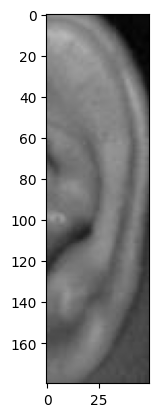

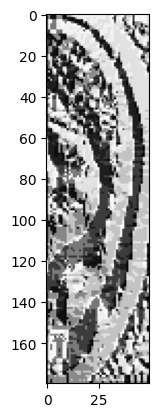

In [21]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = 'D:/Master2/ML2/TP/iitdelhi/001_1.bmp' #local path of iitdelhi dataset
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width), np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()
   


In [22]:
#for all images
path = 'D:/Master2/ML2/TP/iitdelhi' #local path of iitdelhi dataset
imagePaths = [os.path.join(path, f) for f in os.listdir(path)]

data = []

for imagePath in imagePaths:

    img_bgr = cv2.imread(imagePath)

    height, width, _ = img_bgr.shape

    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    img_lbp = np.zeros((height, width), np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    data.append(img_lbp)
print("LBP Program is finished")

data = np.array(data)
data.shape

LBP Program is finished


(493, 180, 50)

In [23]:
data2_lbp = []

for i in data:
    data2_lbp.append(i.reshape(-1))

data_lbp = np.array(data2)
data_lbp.shape

(493, 9000)

In [24]:
#split data
x_train_lbp, x_test_lbp, y_train_lbp, y_test_lbp = train_test_split(data_lbp, labels, test_size = 0.3, stratify = labels)
x_train_lbp.shape

(345, 9000)

### Classification

In [25]:
#Classification usin KNN classifier
modelknn.fit(x_train_lbp, y_train_lbp)

# Testing the classifier
y_pred3 = modelknn.predict(x_test_lbp)

In [26]:
print("\n Classification report of the model: \n",classification_report(y_test_lbp, y_pred3))



 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.67      1.00      0.80         2
         002       0.50      1.00      0.67         1
         003       0.67      1.00      0.80         2
         004       0.50      1.00      0.67         2
         005       1.00      1.00      1.00         1
         006       1.00      1.00      1.00         1
         007       1.00      1.00      1.00         1
         008       0.50      1.00      0.67         1
         009       1.00      1.00      1.00         1
         010       1.00      1.00      1.00         1
         011       0.25      1.00      0.40         1
         012       1.00      1.00      1.00         1
         013       1.00      1.00      1.00         1
         014       0.00      0.00      0.00         1
         015       1.00      1.00      1.00         1
         016       0.50      1.00      0.67         1
         017       1.00      1.00      1.

C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Classification using ANN model

x_train_lbp = x_train_lbp/ 255
x_test_lbp = x_test_lbp/255

y_train_lbp = np_utils.to_categorical(y_train_lbp)
y_test_lbp = np_utils.to_categorical(y_test_lbp)

y_train_lbp = np.array(y_train_lbp)
x_train_lbp.shape

(345, 9000)

In [28]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=350, activation='sigmoid', input_dim=x_train_lbp.shape[1]))
                      
model.add(Dense(units=290, activation='sigmoid'))

model.add(Dense(units=126, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit( x_train_lbp, y_train, epochs = 250)


Epoch 1/250
11/11 [==============================] - 0s 21ms/step - loss: 5.1339 - accuracy: 0.0029
Epoch 2/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8754 - accuracy: 0.0058
Epoch 3/250
11/11 [==============================] - 0s 21ms/step - loss: 4.8506 - accuracy: 0.0116
Epoch 4/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8448 - accuracy: 0.0116
Epoch 5/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8294 - accuracy: 0.0029
Epoch 6/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8461 - accuracy: 0.0029
Epoch 7/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8383 - accuracy: 0.0058
Epoch 8/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8325 - accuracy: 0.0029
Epoch 9/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8297 - accuracy: 0.0116
Epoch 10/250
11/11 [==============================] - 0s 20ms/step - loss: 4.8284 - accuracy: 0.0116

In [29]:
model.predict(x_test_lbp)

array([[1.50806557e-06, 3.16899433e-03, 1.45046634e-03, ...,
        5.27053315e-04, 1.31340604e-03, 1.43836881e-03],
       [1.32701848e-06, 2.74316687e-02, 6.05802238e-03, ...,
        1.26317504e-03, 1.32411700e-02, 3.25895671e-04],
       [6.14119926e-07, 1.23634823e-02, 9.06295795e-03, ...,
        4.24476821e-06, 8.17374233e-03, 4.96351793e-02],
       ...,
       [6.15707677e-07, 1.21378899e-02, 9.01306514e-03, ...,
        4.23814845e-06, 8.06208234e-03, 5.00071347e-02],
       [1.74647141e-06, 1.51259415e-02, 1.51104182e-02, ...,
        2.22841464e-03, 2.22033001e-02, 2.14109445e-04],
       [9.39946688e-07, 1.12861777e-02, 1.16388118e-02, ...,
        1.02548483e-05, 9.36291181e-03, 4.05759439e-02]], dtype=float32)

### Featuer Extraction: BSIF Descriptor

In [31]:
np.seterr(over='ignore', under='ignore')

def bsif(img, texturefilters_path, mode = ''):
    texturefilters = np.load(texturefilters_path)
    numScl = texturefilters.shape[2]
    codeImg = np.ones(img.shape)
    r = int(np.floor(texturefilters.shape[0] / 2))
    upimg = img[0:r, :]
    btimg = img[-r:, :]
    lfimg = img[:, 0: r]
    rtimg = img[:, -r:]
    cr11 = img[0:r, 0: r]
    cr12 = img[0:r, -r:]
    cr21 = img[-r:, 0: r]
    cr22 = img[-r:, -r:]
    imgWrap = np.zeros((img.shape[0] + 2*r, img.shape[1] + 2*r))
    imgWrap[:r, :r] = cr22; imgWrap[:r, r:img.shape[1] + r] = btimg; imgWrap[:r, img.shape[1] + r:img.shape[1] + 2*r] = cr21
    imgWrap[r:img.shape[0] + r, 0:r] = rtimg
    imgWrap[r:img.shape[0] + r, r:img.shape[1] + r] = img
    imgWrap[r:img.shape[0] + r, img.shape[1] + r:img.shape[1] + 2*r] = lfimg
    imgWrap[img.shape[0] + r:img.shape[0] + 2*r, :r] = cr12; imgWrap[img.shape[0] + r:img.shape[0] + 2*r, r:img.shape[1] + r] = upimg; imgWrap[img.shape[0] + r:img.shape[0] + 2*r, img.shape[1] + r:img.shape[1] + 2 * r] = cr11
    for i in range(0, numScl):
        tmp = texturefilters[:, :, numScl - (i + 1)]
        ci = signal.convolve2d(imgWrap, np.rot90(tmp, 2), mode='valid')
        ci = (ci > 0) * (2**i)
        codeImg = codeImg + ci
    if mode == 'h':
        bsifdescription = np.zeros((2**numScl))
        for i in range(0, (2**numScl)): bsifdescription[i] = (codeImg == (i + 1)).sum()
        return bsifdescription
    if mode == 'nh':
        bsifdescription = np.zeros(2 ** numScl)
        for i in range(0, 2 ** numScl): bsifdescription[i] = (codeImg == i).sum()
        bsifdescription = bsifdescription / np.max(bsifdescription)
        return bsifdescription
    else:
        return codeImg

def show_image(image):
    matplotlib.use('TkAgg')
    plt.figure()
    imgplot = plt.imshow(image, cmap='gray')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

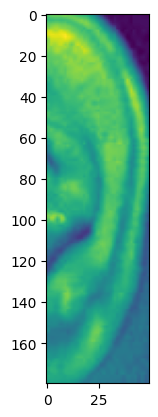

In [32]:
#for one image
img = cv2.imread('D:/Master2/ML2/TP/iitdelhi/001_1.bmp') #local path of iitdelhi dataset
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img.load() 
img = np.array(img)
#show_image(img)
plt.imshow(img)
plt.show


img bsif description shape:  (4096,)


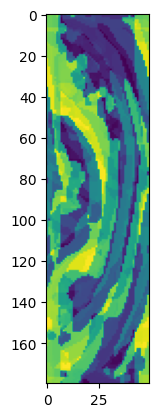

In [33]:
bsif_filter = 'D:/Master2/ML2/TP/bsif python/filters/ICAtextureFilters_15x15_12bit.npy' #local path of Bsif filter

img_bsif = bsif(img, bsif_filter)
#show_image(img_bsif)
plt.imshow(img_bsif)
plt.show

img_bsifdescription = bsif(img, bsif_filter, 'h')
print('img bsif description shape: ', img_bsifdescription.shape)

In [34]:
#for all images
imgs_bsif = []
for i in Data_gray:
    imgs_bsif.append(bsif(i, bsif_filter,'h'))
    
imgs_bsif = np.array(imgs_bsif)

In [35]:
imgs_bsif[0].shape

(4096,)

In [36]:
x_train_bsif, x_test_bsif, y_train_bsif, y_test_bsif = train_test_split(imgs_bsif, labels, test_size = 0.3, stratify = labels)

### Classification

In [37]:
# Classification using KNN model
modelknn.fit(x_train_bsif, y_train_bsif)

# Testing the classifier
y_pred4 = modelknn.predict(x_test_bsif)


In [38]:
print("\n Classification report of the model: \n",classification_report(y_test_bsif, y_pred4))


 Classification report of the model: 
               precision    recall  f1-score   support

         001       1.00      1.00      1.00         2
         002       0.50      1.00      0.67         1
         003       1.00      1.00      1.00         2
         004       1.00      1.00      1.00         2
         005       1.00      1.00      1.00         1
         006       0.00      0.00      0.00         1
         007       1.00      1.00      1.00         1
         008       1.00      1.00      1.00         1
         009       0.33      1.00      0.50         1
         010       1.00      1.00      1.00         1
         011       0.50      1.00      0.67         1
         012       1.00      1.00      1.00         1
         013       1.00      1.00      1.00         1
         014       1.00      1.00      1.00         1
         015       0.50      1.00      0.67         1
         016       1.00      1.00      1.00         1
         017       1.00      1.00      1.

C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\TF\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Classification using ANN model

#Normalization
x_train_bsif = x_train_bsif/ 255
x_test_bsif = x_test_bsif/255

y_train_bsif = np_utils.to_categorical(y_train_bsif)
y_test_bsif = np_utils.to_categorical(y_test_bsif)

y_train_bsif = np.array(y_train_bsif)

In [40]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=200, activation='sigmoid', input_dim = x_train_bsif.shape[1]))

model.add(Dense(units=350, activation='sigmoid'))
model.add(Dense(units=126, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train_bsif,y_train_bsif, epochs = 250)

Epoch 1/250
11/11 [==============================] - 0s 6ms/step - loss: 5.1708 - accuracy: 0.0029
Epoch 2/250
11/11 [==============================] - 0s 4ms/step - loss: 4.8758 - accuracy: 0.0087
Epoch 3/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8456 - accuracy: 0.0058
Epoch 4/250
11/11 [==============================] - 0s 4ms/step - loss: 4.8275 - accuracy: 0.0058
Epoch 5/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8242 - accuracy: 0.0058
Epoch 6/250
11/11 [==============================] - 0s 11ms/step - loss: 4.8032 - accuracy: 0.0261
Epoch 7/250
11/11 [==============================] - 0s 9ms/step - loss: 4.7969 - accuracy: 0.0000e+00
Epoch 8/250
11/11 [==============================] - 0s 5ms/step - loss: 4.7883 - accuracy: 0.0116
Epoch 9/250
11/11 [==============================] - 0s 6ms/step - loss: 4.7797 - accuracy: 0.0261
Epoch 10/250
11/11 [==============================] - 0s 6ms/step - loss: 4.7761 - accuracy: 0.0174
Epoc

In [41]:
model.predict(x_test_bsif)

array([[6.3420011e-09, 2.1339962e-05, 9.8508178e-07, ..., 1.3665547e-07,
        7.5337525e-06, 2.9010363e-07],
       [2.6287526e-07, 3.1655468e-04, 3.5649680e-03, ..., 3.0888335e-03,
        2.3443597e-05, 3.7045873e-05],
       [9.1436732e-08, 1.0699192e-04, 5.5508269e-03, ..., 7.8681455e-04,
        1.6042545e-04, 3.8037524e-06],
       ...,
       [7.5763094e-09, 2.8651928e-06, 1.0483758e-05, ..., 1.9960003e-06,
        1.6462089e-05, 3.4162767e-06],
       [3.5730952e-09, 4.6958363e-07, 3.5597834e-05, ..., 5.5039777e-06,
        3.5694175e-05, 8.4392831e-08],
       [1.9834319e-08, 3.1352388e-07, 2.3542386e-06, ..., 1.2512620e-04,
        2.0028945e-04, 7.8958328e-05]], dtype=float32)

In [42]:
model.evaluate(x_test_bsif, y_test_bsif)

5/5 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.9527


[0.22776469588279724, 0.9527027010917664]